In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def run_simulation(epsilon):
    K = 10
    TRUE_ACTION_VALUES = np.random.randn(K)
    rewards = []

    def sample_reward(index):
        return np.random.randn() + TRUE_ACTION_VALUES[index]

    def choose_action(epsilon, q):
        explore = np.random.rand() < epsilon
        return np.random.randint(K) if explore else np.argmax(q)
    
    q = np.zeros(K)
    n = np.zeros(K)

    for i in range(1000):
        a = choose_action(epsilon, q)
        r = sample_reward(a)
        n[a] += 1
        q[a] = q[a] + (1 / n[a]) * (r - q[a])
        
        rewards.append(r)

    return rewards

In [3]:
epsilons = [0.0, 0.01, 0.1]
results = {}

for epsilon in epsilons:
    all_rewards = []
    for i in range(2000):
        rewards = run_simulation(epsilon)
        all_rewards.append(rewards)
    
    all_rewards = np.array(all_rewards)
    average_reward_per_step = np.mean(all_rewards, axis=0)
    results[epsilon] = average_reward_per_step 

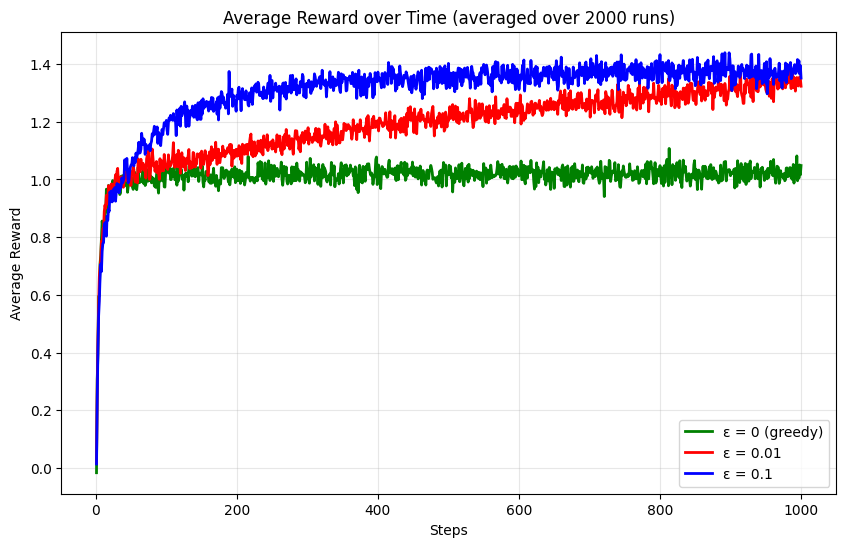

In [4]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, 1001), results[0.0], 'g-', linewidth=2, label='ε = 0 (greedy)')
plt.plot(range(1, 1001), results[0.01], 'r-', linewidth=2, label='ε = 0.01')
plt.plot(range(1, 1001), results[0.1], 'b-', linewidth=2, label='ε = 0.1')
plt.xlabel('Steps')
plt.ylabel('Average Reward')
plt.title('Average Reward over Time (averaged over 2000 runs)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()
